KNN Classifier Model:

It is a supervised learning technique consisting of catergorical taget.

In classification we predict categories using decision boundary or hyperplane.

In KNN classifier, model is created having the ability to classify the new observation into correct category.

KNN is K-Nearest Neighbour algorithum works on Elucedian distance & Majority.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings ("ignore")

In [ ]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


The given dataset is for a product launched by company.

Company wants to keep a track on visitor who are visiting website, whether the visitor is clicking on purchase button or not.

On the basis of age & estimated salary whether the product is being purchased by visitor or not.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


400 Responses and 5 Features are present in dataset.

No Missing Values are present.

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Age has Normal distribution

EstimatedSalary has some skewness on left hand side; also some variance is present.

In [ ]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

0==> Not Purchased

1==> Purchased

Dataset is imbalanced. i.e. categories are not evenly divided.

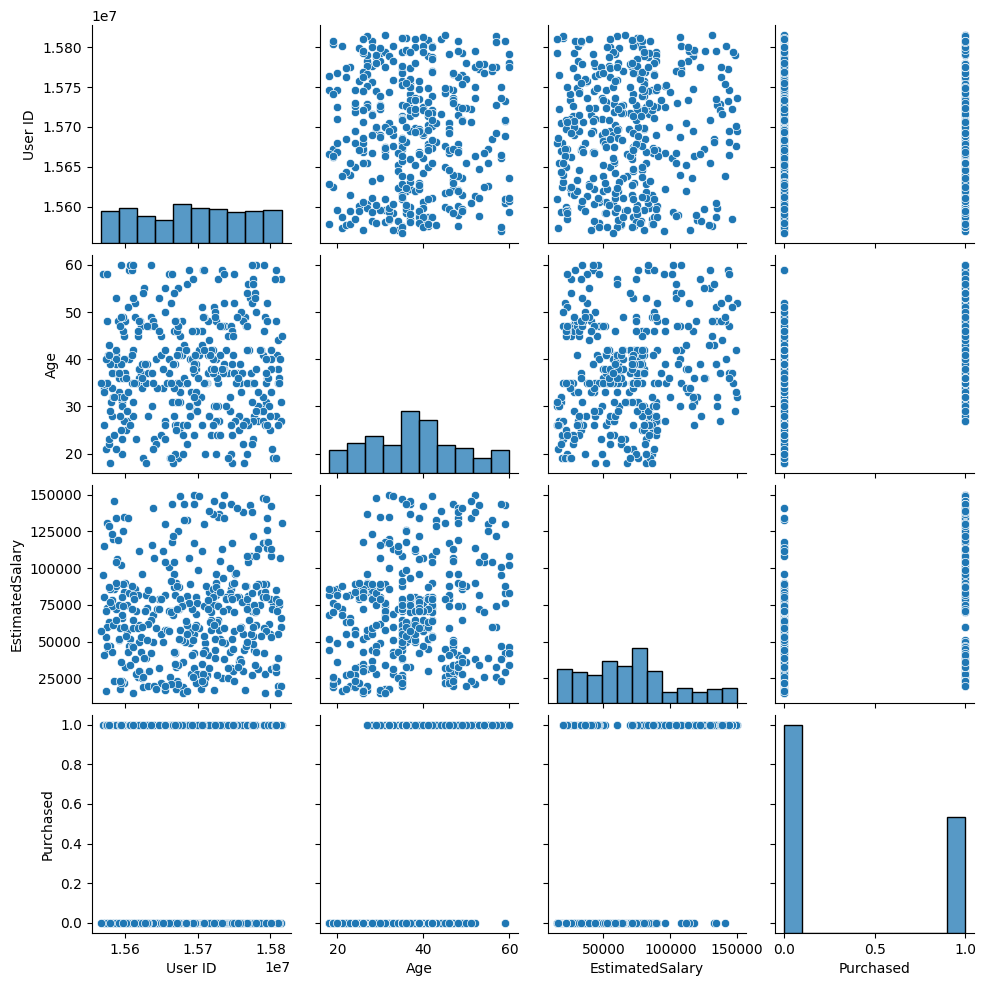

In [ ]:
sns.pairplot(df)

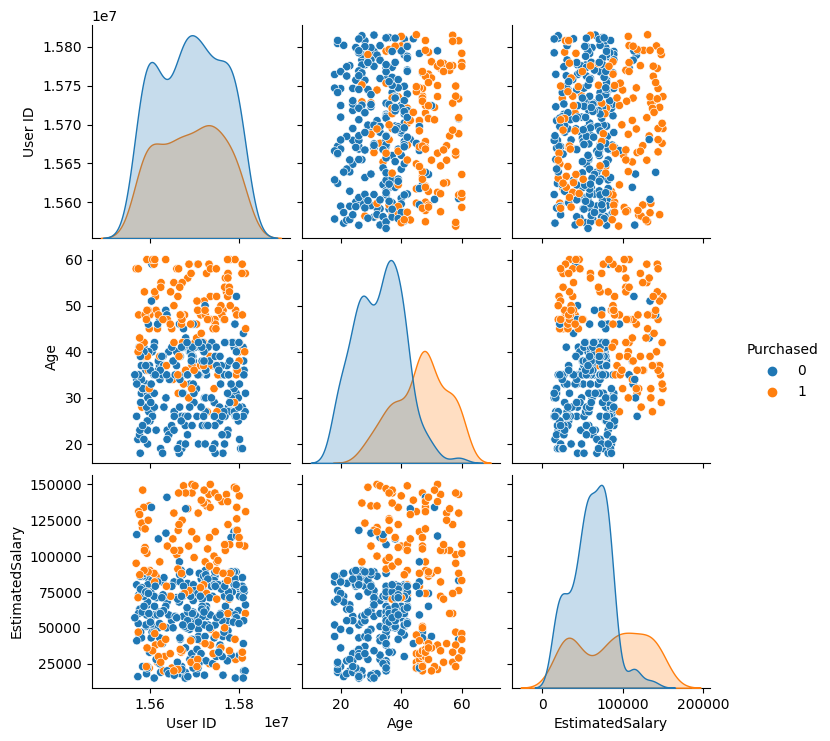

In [ ]:
sns.pairplot(df,hue="Purchased")

In [ ]:
x=df.iloc[:,[2,3]]
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

**KNN Model**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain) 
ypred=knn.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred) 
cr=classification_report(ytest,ypred)

print(f"Accuracy:{ac}\n{cm}\n\n{cr}")

Accuracy:0.83
[[59  9]
 [ 8 24]]

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        68
           1       0.73      0.75      0.74        32

    accuracy                           0.83       100
   macro avg       0.80      0.81      0.81       100
weighted avg       0.83      0.83      0.83       100



In [ ]:
trainac =[]
testac =[]

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    
    train = knn.score(xtrain, ytrain)
    test = knn.score(xtest, ytest)
    
    trainac.append(train)
    testac.append(test) 

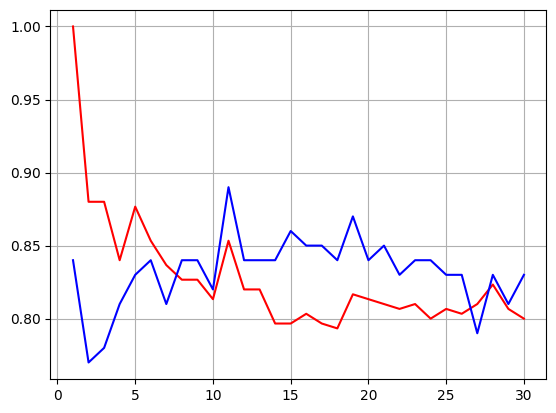

In [ ]:
plt.plot(range(1,31), trainac, color="red")
plt.plot(range(1,31), testac, color="blue")
plt.grid()

At k=6 to 8 the line is intersecting so check with k=6 and rerun the model.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy:{ac}\n {cm}\n\n{cr}")

train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)

print(f"Training Accuracy:{train}\n Testing Accuracy:{test}")

Accuracy:0.84
 [[64  4]
 [12 20]]

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        68
           1       0.83      0.62      0.71        32

    accuracy                           0.84       100
   macro avg       0.84      0.78      0.80       100
weighted avg       0.84      0.84      0.83       100

Training Accuracy:0.8533333333333334
 Testing Accuracy:0.84


**Forecasting New Observation**

In [23]:
def purchase():
  age=float(input("Enter age:"))
  es=float(input("Enter Salary:"))
  newob=[[age,es]]
  yp=knn.predict(newob)[0]
  if(yp==1):
    print("Yes,Customer will buy product")
  else:
    print("No,Customer will not buy product")

In [24]:
purchase()

Enter age:29
Enter Salary:360000
Yes,Customer will buy product
